In [2]:
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
## abrir e primeira visualizaçao dos dados

df = pd.read_csv('../data/input/winequality.csv', sep = ';')

print ('Tamanho tabela dados: {}'.format(df.shape))

df.head(3)

Tamanho tabela dados: (6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


In [5]:
df['type'].value_counts()

White    4898
Red      1599
Name: type, dtype: int64

## problemas de dados

a coluna alcohol apresenta strings ao invez de numeros. <br>
em inspecao mais detalhada, vemos que temos numeros com multiplos separadores, exemplo: 103.003.333.333.333 <br>
criemos e apliquemos uma funcao para corrigir a mesma.

In [6]:
def fix_alcohol (value):
    
    if value.count('.') > 1:
        
        return float(value[:3])/10.0
    
    else:
        
        return float(value)

In [7]:
df['alcohol'] = df['alcohol'].map(fix_alcohol)

## primeiros insights

aparentemente temos uma variavel categorica "type" <br>
11 variaveis numericas, das quais 10 devem ser nulo positiva definidas e 1 deve estar no dominio -7+7 (pH) <br>
1 target, que tambem deve ser nula positiva definida, no dominio 0-10 <br>
<br>
vamos verificar a validade das nossas premissas

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,10.597477,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,3.214091,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,97.300000,9.000000


De fato, temos que os valores estao dentro dos dominios esperados. <br>
Tambem podemos ver que nao ha valores nulos/invalidos. <br>
<br>
Contando com o target, temos 13 variaveis. Vamos explorar suas distribuicoes. <br><br>
Primeiramente notemos que temos tipos distintos de vinho, entendemos que cada vinho tem suas caracteristicas com pesos diferentes para determinar sua qualidade, logo, levemos isso em consideracao.

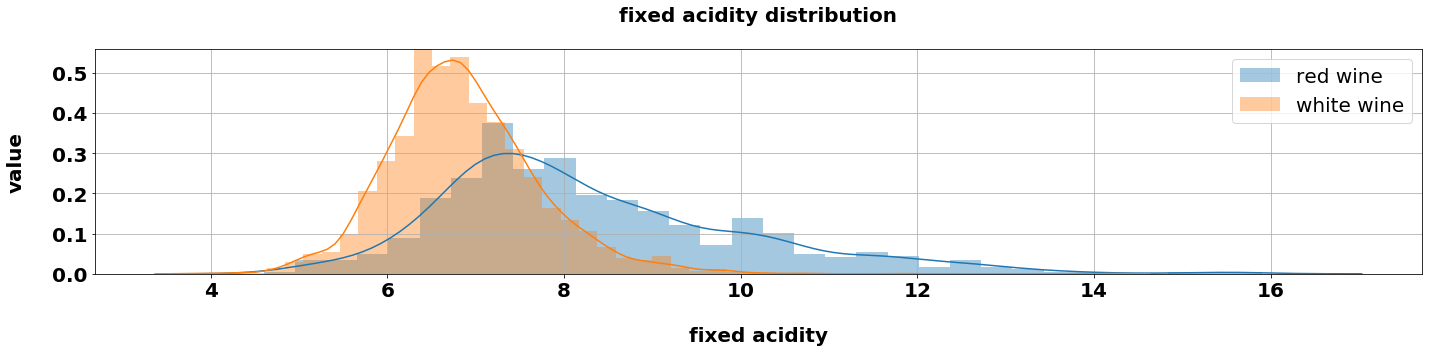

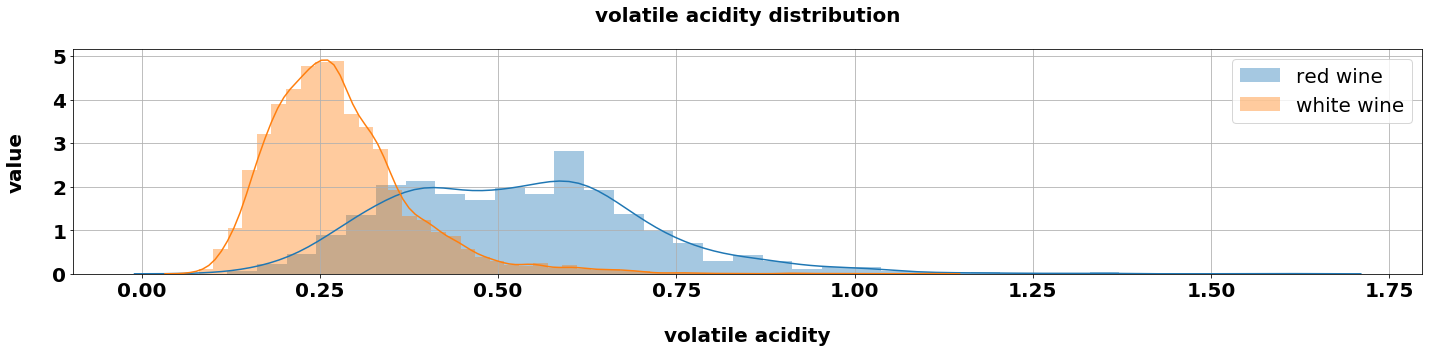

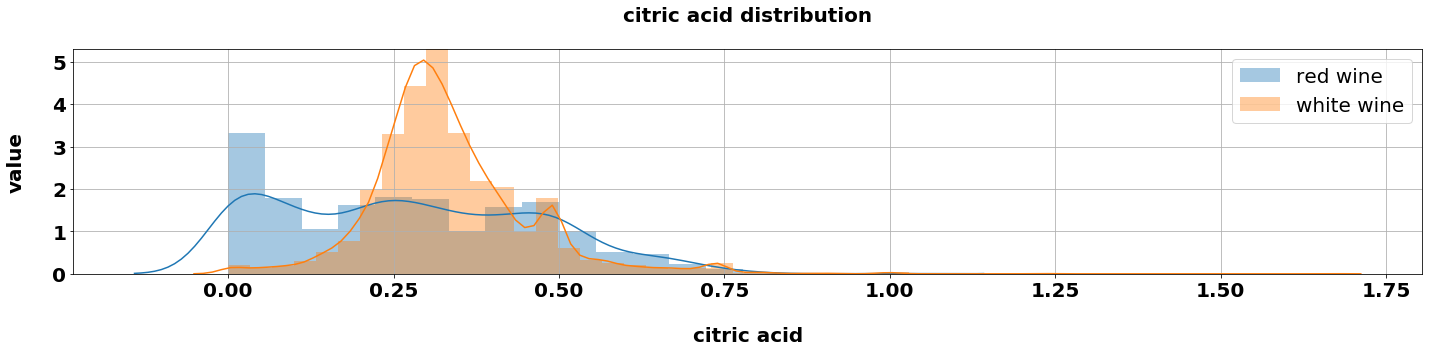

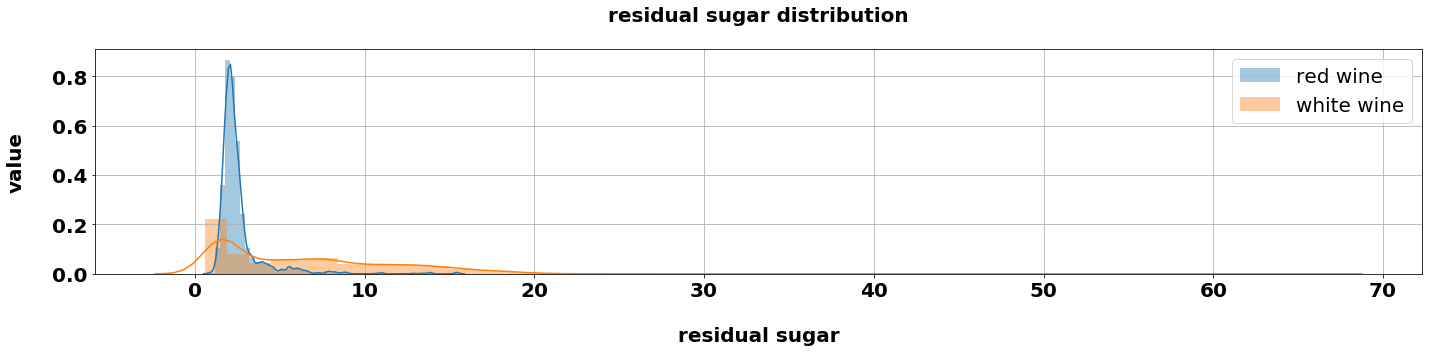

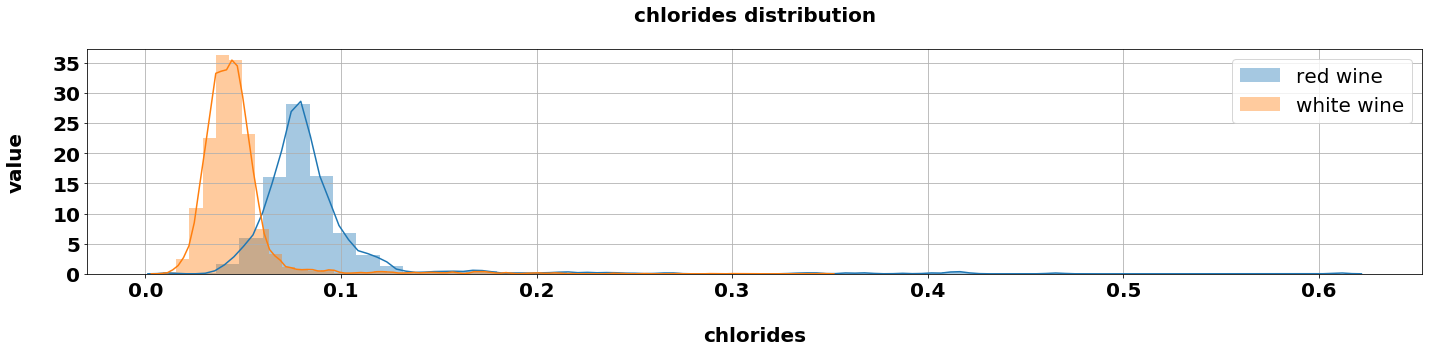

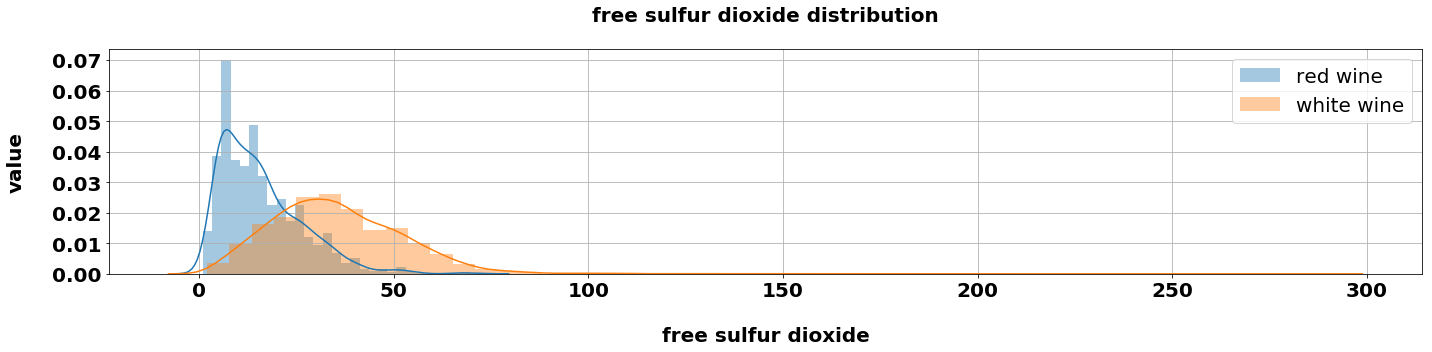

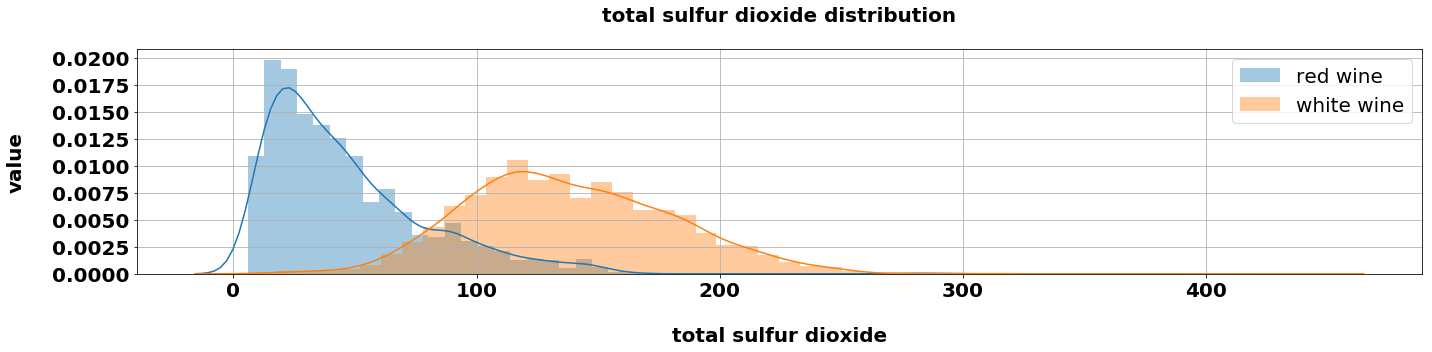

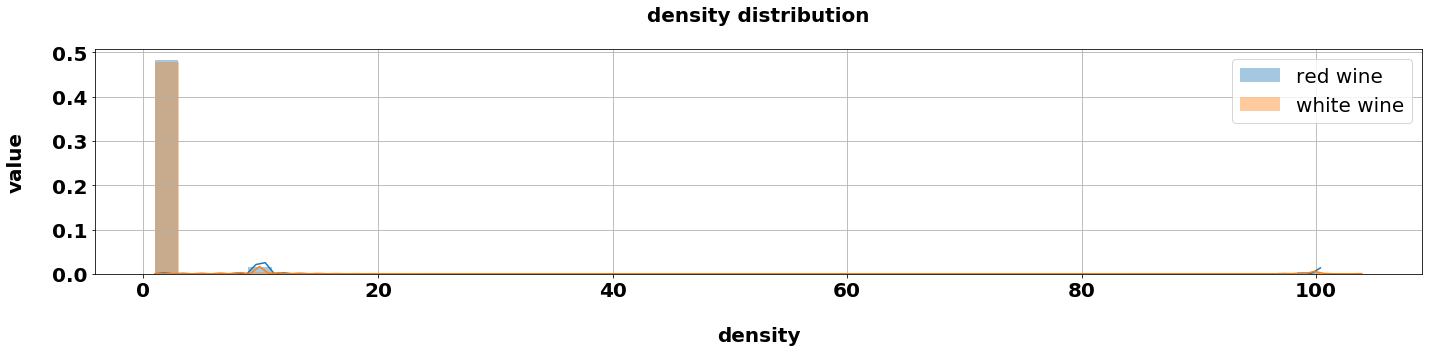

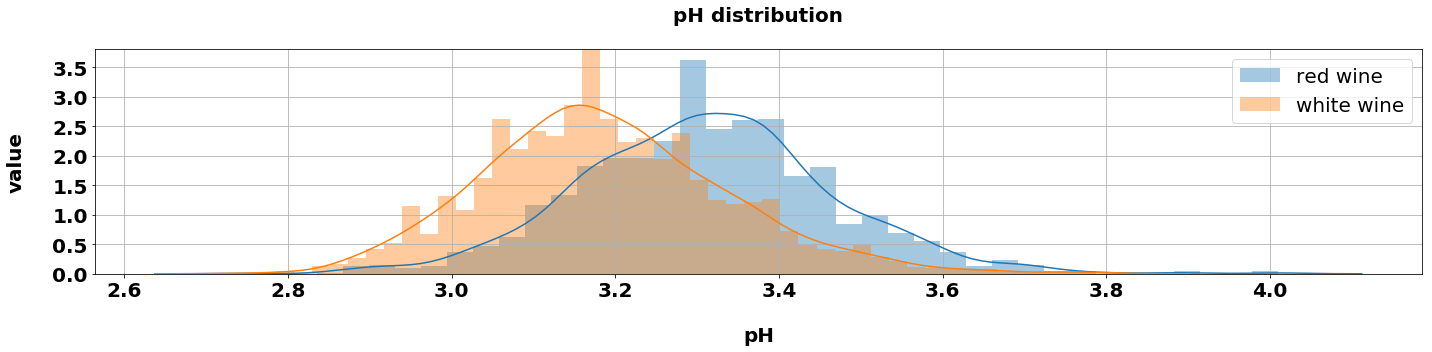

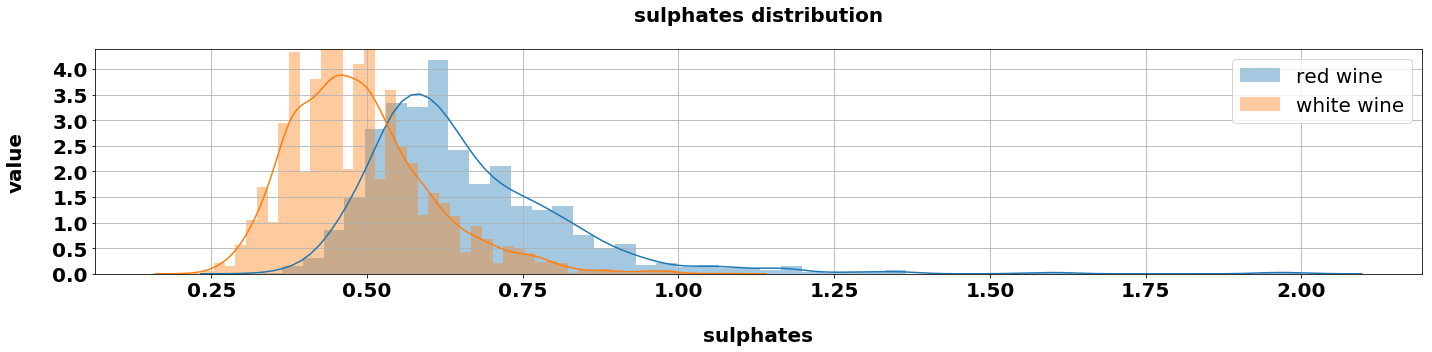

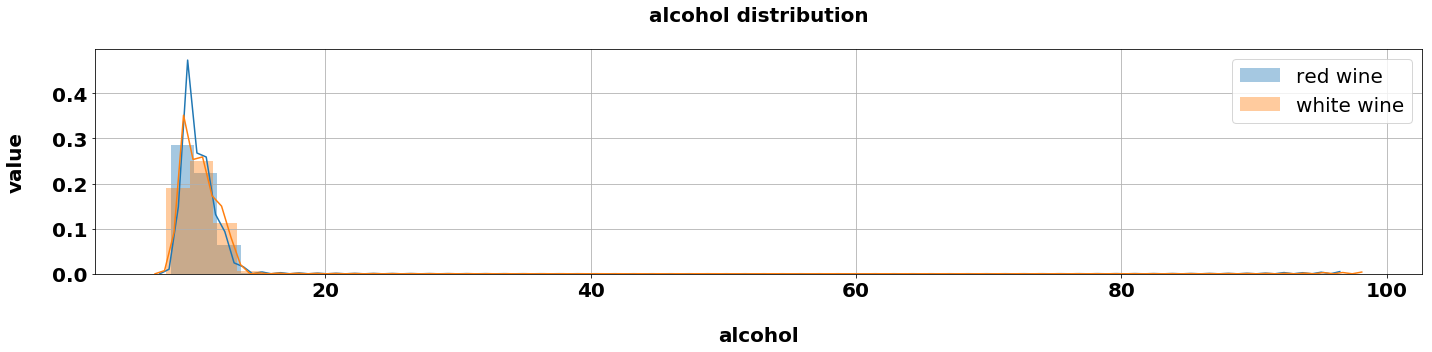

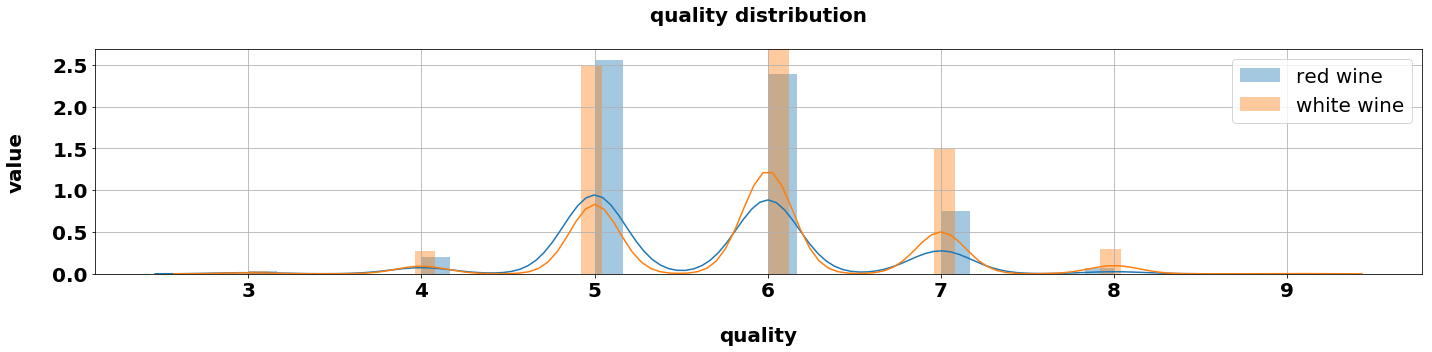

In [9]:
red_whine = df.loc[df['type']=='Red']
white_whine = df.loc[df['type']=='White']

text_args = {'fontsize':20,'fontweight':'bold'}


for col in [u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality']:

    plt.figure(figsize=(20,5))

    sns.distplot(red_whine[col])
    sns.distplot(white_whine[col])

    plt.xticks(**text_args)
    plt.yticks(**text_args)
    plt.xlabel('\n'+col, **text_args)
    plt.ylabel('value\n', **text_args)
    plt.title('{} distribution\n'.format(col), text_args)

    plt.grid()

    plt.tight_layout()

    plt.legend(['red wine','white wine'], fontsize=20);

O grafico de distribuicao da densidade contem outliers. <br>
Vamos entao analisar e excluir os outliers para a visualizacao. <br>

In [10]:
df['density'].describe([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99])

count    6497.000000
mean        1.710882
std         7.636088
min         0.987110
0%          0.987110
10%         0.990670
20%         0.991800
30%         0.992800
40%         0.993800
50%         0.994890
60%         0.995680
70%         0.996550
80%         0.997400
90%         0.998400
91%         0.998600
92%         0.998693
93%         0.998846
94%         0.999100
95%         0.999392
96%         0.999600
97%         0.999800
98%        10.001000
99%        10.008000
max       103.898000
Name: density, dtype: float64

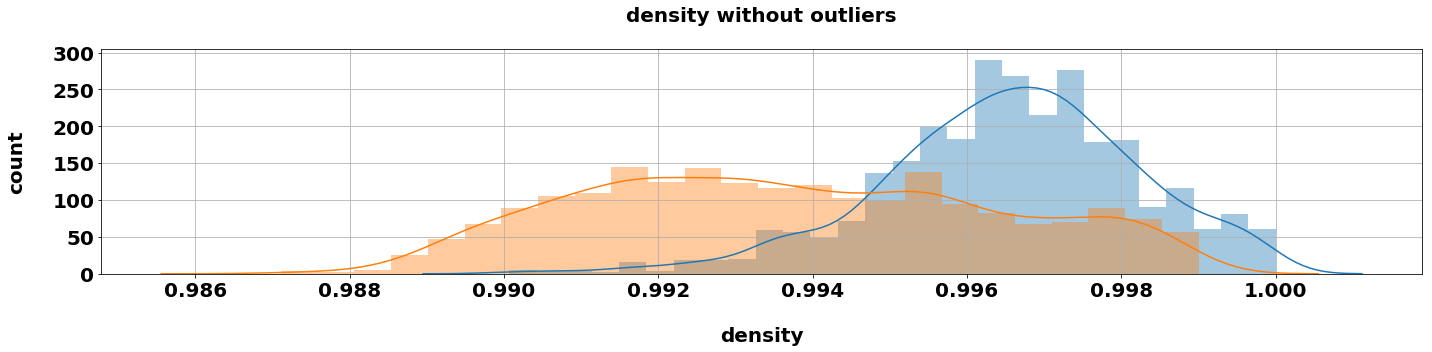

In [11]:
plt.figure(figsize=(20,5))

sns.distplot(red_whine.loc[red_whine['density']<=red_whine['density'].describe(percentiles=[0,0.95])['95%'], 'density'])
sns.distplot(white_whine.loc[white_whine['density']<=white_whine['density'].describe(percentiles=[0,0.95])['95%'], 'density'])

plt.title('density without outliers\n', **text_args)
plt.xticks(**text_args)
plt.yticks(**text_args)
plt.xlabel('\ndensity',**text_args)
plt.ylabel('count\n',**text_args)

plt.tight_layout()

plt.grid()

Podemos ver que a densidade é um coeficiente muito proximo de 1 na maior parte das vezes. <br>
Vamos assumir que ele é representativo da densidade relative em relação a agua. <br>
Nao faria sentido termos um vinho 10x ou 100x mais denso que a agua. <br>
Imaginemos entao que esses dados estao com erros, e deveriam ser valores ~1. <br>
Temos a opcao de descarta-los, mas vamos aplicar essa correcao, que parece razoavel. 

In [12]:
def fix_density (density):
    
    while density >= 10:
        
        density = density / 10.0
        
    return density

In [13]:
red_whine['density'] = red_whine['density'].map(fix_density)
white_whine['density'] = white_whine['density'].map(fix_density)

Quando olhamos para as demais distribuicoes, tambem vemos outliers presentes para diversos outros atributos. <br>
De fato, a maior parte delas é altamente **skewed**. Porem dentro de seus contextos e valores apresentados, as mesmas parecem razoaveis. <br><br>

Exploremos agora as correlacoes dos atributos.

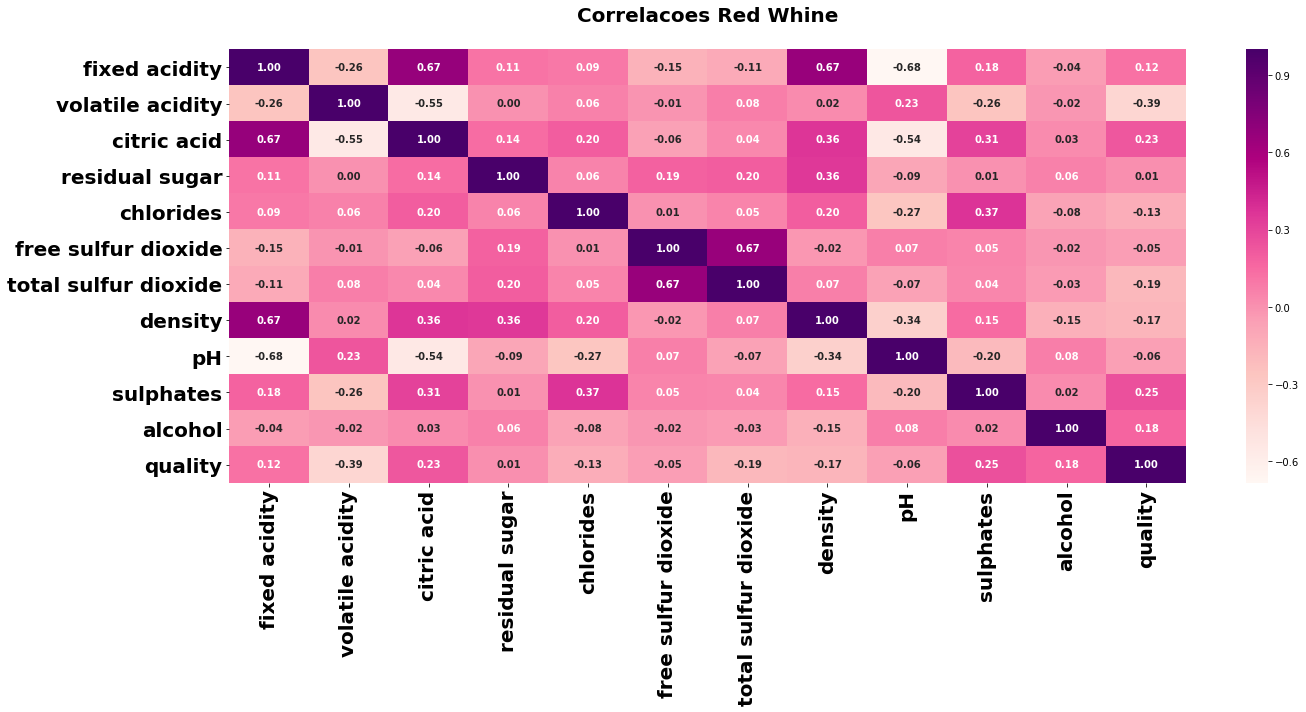

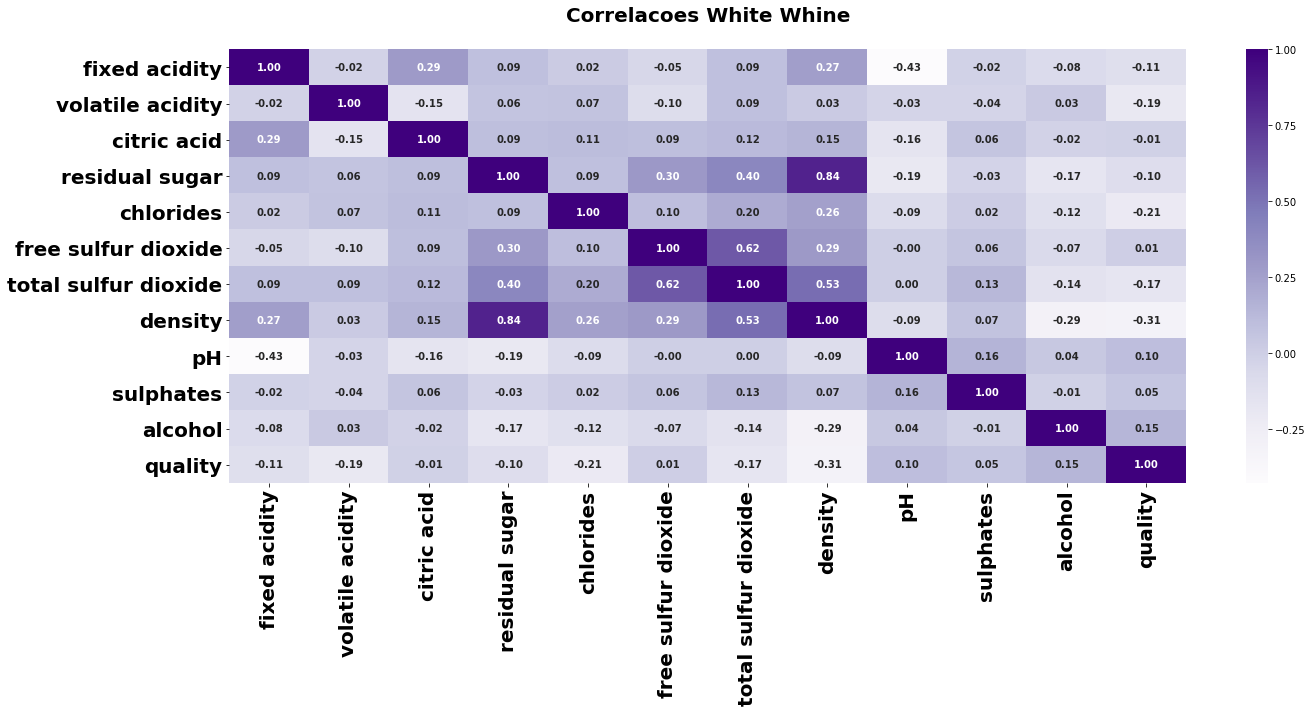

In [14]:
plt.figure(figsize=(20,10))

sns.heatmap(
    red_whine.drop('type',1).corr(), 
    annot=red_whine.drop('type',1).corr(), 
    fmt='.2f', 
    annot_kws={'fontsize':10, 'fontweight':'bold'},
    cmap='RdPu'
)

plt.title('Correlacoes Red Whine\n', **text_args)
plt.xticks(**text_args)
plt.yticks(**text_args)

plt.tight_layout()

plt.figure(figsize=(20,10))

sns.heatmap(
    white_whine.drop('type',1).corr(), 
    annot=white_whine.drop('type',1).corr(), 
    fmt='.2f', 
    annot_kws={'fontsize':10, 'fontweight':'bold'},
    cmap='Purples'
)

plt.title('Correlacoes White Whine\n', **text_args)
plt.xticks(**text_args)
plt.yticks(**text_args)

plt.tight_layout()

salvemos entao os dados, para a modelagem

In [15]:
red_whine.drop('type',1).to_csv('../data/input/red_whine.csv', index=False)
white_whine.drop('type',1).to_csv('../data/input/white_whine.csv', index=False)